# `Soundscapy` - Quick Start Guide

By Andrew Mitchell, Research Fellow, University College London

## Background

`Soundscapy` is a python toolbox for analysing quantitative soundscape data. Urban soundscapes are typically assessed through surveys which ask respondents how they perceive the given soundscape. Particularly when collected following the technical specification ISO 12913, these surveys can constitute quantitative data about the soundscape perception. As proposed in *How to analyse and represent quantitative soundscape data* [(Mitchell, Aletta, & Kang, 2022)](https://asa.scitation.org/doi/full/10.1121/10.0009794), in order to describe the soundscape perception of a group or of a location, we should consider the distribution of responses. `Soundscapy`'s approach to soundscape analysis follows this approach and makes it simple to process soundscape data and visualise the distribution of responses. 

For more information on the theory underlying the assessments and forms of data collection, please see ISO 12913-Part 2, *The SSID Protocol* [(Mitchell, *et al.*, 2020)](https://www.mdpi.com/2076-3417/10/7/2397), and *How to analyse and represent quantitative soundscape data*.

## This Notebook

The purpose of this notebook is to give a brief overview of how `Soundscapy` works and how to quickly get started using it to analyse your own soundscape data. The example dataset used is *The International Soundscape Database (ISD)* (Mitchell, *et al.*, 2021), which is publicly available at [Zenodo](https://zenodo.org/record/6331810) and is free to use. `Soundscapy` expects data to follow the format used in the ISD, but can be adapted for similar datasets.

----------

## Installation

`Soundscapy` is currently under active development and has not yet been released on PyPI. However, it is fairly straightforward to use `pip` to install directly from the Github page, or you can clone the git repo. To install with `pip`:

First, download the environment.yml and create the necessary conda environment:

```
conda env create -f environment.yml
conda activate soundscapy-dev
```

Then, install `Soundscapy` from Github using `pip`

```
pip install git+git://github.com/MitchellAcoustics/Soundscapy@main
```

----

## Working with data

### Some technical notes
`Soundscapy` is built on top of `pandas` DataFrames for working with the data. The majority of the functionality is implemented using `pandas` extensions, like `@register_dataframe_method`. In `Soundscapy`, these methods are contained within the `.isd` accessor. If you're not familiar with [`pandas` extensions](https://pandas.pydata.org/pandas-docs/stable/development/extending.html), they effectively allow us to create custom methods to apply to `pandas` DataFrames. You can access these using the `isd` namespace, as we'll show below.

### Loading data

Data can be loaded as normal using `pandas`' `read_csv()` or `read_excel()` functions. However, we have made a built in function to access the ISD directly from the Zenodo URL, which will automatically default to the latest version of the ISD. 

In [1]:
# Add soundscapy to the Python path, if working with a local copy of the `Soundscapy` repo. Not necessary if installed with pip
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

# Import Soundscapy
import soundscapy

df = soundscapy.isd.load_isd_dataset()
df

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
0,CamdenTown,CamdenTown1,CT101,525.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.30,36.019181
1,CamdenTown,CamdenTown1,CT101,561.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.30,36.019181
2,CamdenTown,CamdenTown1,CT101,526.0,English,0,2019-05-02 11:41:00,2019-05-02 11:44:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.30,36.019181
3,CamdenTown,CamdenTown1,CT102,560.0,English,0,2019-05-02 11:50:00,2019-05-02 11:53:00,51.539124,-0.142624,...,0.01790,0.362,0.268,80.27,71.26,8.38,6.25,7.82,14.70,40.523268
4,CamdenTown,CamdenTown1,CT103,527.0,English,0,2019-05-02 11:49:00,2019-05-02 11:54:00,51.539124,-0.142624,...,0.00889,0.370,0.193,76.79,66.71,4.23,7.61,3.99,13.40,27.108635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,TorringtonSq,TorringtonSq5,TS537,NaN,NaN,1,NaT,NaT,NaN,NaN,...,0.00550,0.399,0.203,71.77,52.90,5.61,12.97,8.31,10.80,9.987229
1905,TorringtonSq,TorringtonSq5,TS538,NaN,NaN,1,NaT,NaT,NaN,NaN,...,0.00916,0.359,0.230,68.85,56.30,10.09,9.27,8.16,9.99,14.359218
1906,TorringtonSq,TorringtonSq5,TS539,NaN,NaN,1,NaT,NaT,NaN,NaN,...,0.00967,0.363,0.481,79.33,64.32,14.80,13.95,20.39,10.90,30.033977
1907,TorringtonSq,TorringtonSq5,TS540,NaN,NaN,1,NaT,NaT,NaN,NaN,...,0.00902,0.445,0.257,67.57,49.33,2.64,12.12,5.04,9.62,7.882057


### Data included

The ISD contains two primary types of data - surveys and acoustic metrics. The surveys include several blocks of questions, the most important of which are the Perceptual Attribute Questions (PAQS). These form the 8 descriptors of the soundscape circumplex - pleasant, vibrant, eventful, chaotic, annoying, monotonous, uneventful, and calm. In addition, each survey includes other information about the soundscape and demographic characteristics (age, gender, etc.). Finally, the survey section includes identifiers of when and where the survey was conducted - the LocationID, SessionID, latitude, longitude, start_time, etc. 

The final bit of information for the survey is the `GroupID`. When stopping respondents in the survey space, they were often stopped as a group, for instance a couple walking through the space would be approached together and given the same `GroupID`. While each group completes the survey, a binaural audio recording is taken, typically lasting about 30 seconds. It is from these recordings that the acoustic data is calculated. Therefore, each `GroupID` can be connected to something like 1 to 10 surveys, and to one recording, or one set of acoustic features.

Within the acoustic data are a set of psychoacoustic analyses calculated for each recording. For each metric, originally one value is calculated for each channel (right and left ear), and the maximum of the to channels is what is shown here.

### Filtering data

The ISD includes survey data and the accompanying acoustic data collected from respondents *in situ* in 13 urban locations in London and Venice. It also include recording-only data taken during the COVID-19 lockdowns in 2020. Since for this example we'll only be looking at survey data, we can start by filtering out the lockdown data.

This is done using a method included in the `isd` `pandas` namespace.

In [2]:
df = df.isd.filter_lockdown()
df.shape

(1338, 78)

### Validating the dataset
 
In order to validate that the dataset includes the data we would expect, and to check for missing or incorrect PAQ data, we use the `validate_dataset()` method. This method can also rename the PAQ columns if necessary.

In [3]:
df, excl = df.sspy.validate_dataset(allow_na=False)
df

Renaming PAQ columns.
Checking PAQ data quality.
Identified 56 samples to remove.
[95, 108, 124, 127, 146, 154, 160, 178, 186, 203, 220, 226, 255, 381, 404, 407, 431, 562, 571, 577, 586, 590, 606, 631, 659, 666, 675, 689, 694, 707, 729, 839, 846, 877, 897, 992, 1007, 1027, 1055, 1056, 1064, 1097, 1214, 1217, 1222, 1223, 1225, 1229, 1235, 1255, 1268, 1269, 1300, 1316, 1321, 1335]


,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
0,CamdenTown,CamdenTown1,CT101,525.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
1,CamdenTown,CamdenTown1,CT101,561.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
2,CamdenTown,CamdenTown1,CT101,526.0,English,0,2019-05-02 11:41:00,2019-05-02 11:44:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
3,CamdenTown,CamdenTown1,CT102,560.0,English,0,2019-05-02 11:50:00,2019-05-02 11:53:00,51.539124,-0.142624,...,0.01790,0.362,0.268,80.27,71.26,8.38,6.25,7.82,14.7,40.523268
4,CamdenTown,CamdenTown1,CT103,527.0,English,0,2019-05-02 11:49:00,2019-05-02 11:54:00,51.539124,-0.142624,...,0.00889,0.370,0.193,76.79,66.71,4.23,7.61,3.99,13.4,27.108635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,TorringtonSq,TorringtonSq4,TS425,1275.0,English,0,2019-10-22 14:02:00,2019-10-22 14:07:00,51.523300,-0.131100,...,0.03750,0.391,0.336,70.83,67.11,6.89,3.25,5.51,13.6,31.166903
1863,TorringtonSq,TorringtonSq4,TS426,1279.0,English,0,2019-10-22 14:10:00,2019-10-22 14:16:00,51.523300,-0.131100,...,0.04250,0.415,0.262,73.79,69.48,9.84,3.85,9.24,14.0,38.629748
1864,TorringtonSq,TorringtonSq4,TS426,1278.0,English,0,2019-10-22 14:12:00,2019-10-22 14:16:00,51.523300,-0.131100,...,0.04250,0.415,0.262,73.79,69.48,9.84,3.85,9.24,14.0,38.629748
1866,TorringtonSq,TorringtonSq4,TS426,1280.0,English,0,2019-10-22 14:12:00,2019-10-22 14:16:00,51.523300,-0.131100,...,0.04250,0.415,0.262,73.79,69.48,9.84,3.85,9.24,14.0,38.629748


When samples are found which need to be excluded based on the PAQ quality checks, a dataframe with these samples will be returned. Then we can take a look at which ones were excluded and why.

In [4]:
excl.sspy.return_paqs()

,RecordID,GroupID,SessionID,LocationID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8
95,NaN,CT411,CamdenTown4,CamdenTown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,ET102,EustonTap1,EustonTap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,1300.0,ET111,EustonTap1,EustonTap,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
171,NaN,ET114,EustonTap1,EustonTap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,1324.0,ET124,EustonTap1,EustonTap,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
198,NaN,ET204,EustonTap2,EustonTap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,1341.0,ET207,EustonTap2,EustonTap,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
222,1356.0,ET218,EustonTap2,EustonTap,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
230,NaN,ET301,EustonTap3,EustonTap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,ET309,EustonTap3,EustonTap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating the ISOPleasant and ISOEventful coordinate values

The analysis methods used by `Soundscapy` are based firstly on converting the 8 PAQs into their projected pleasantness and eventfulness coordinate values (called ISOPleasant and ISOEventful). Although the ISD already includes these values, we'll show how to calculate them from the raw PAQs.

Start by returning a version of the dataset which only includes the PAQs so we won't conflict with the pre-computed ISOCoordinate values.

In [5]:
paqs = df.sspy.return_paqs()
paqs

,RecordID,GroupID,SessionID,LocationID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8
0,525.0,CT101,CamdenTown1,CamdenTown,2.0,3.0,4.0,4.0,2.0,3.0,2.0,1.0
1,561.0,CT101,CamdenTown1,CamdenTown,3.0,2.0,2.0,4.0,4.0,4.0,1.0,1.0
2,526.0,CT101,CamdenTown1,CamdenTown,4.0,3.0,3.0,3.0,4.0,2.0,2.0,2.0
3,560.0,CT102,CamdenTown1,CamdenTown,4.0,2.0,2.0,2.0,3.0,5.0,5.0,5.0
4,527.0,CT103,CamdenTown1,CamdenTown,3.0,5.0,4.0,4.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1862,1275.0,TS425,TorringtonSq4,TorringtonSq,2.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0
1863,1279.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
1864,1278.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0
1866,1280.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0


Now, calculate the ISOCoordinate values.

In [6]:
paqs = paqs.sspy.add_paq_coords()
paqs

,RecordID,GroupID,SessionID,LocationID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,525.0,CT101,CamdenTown1,CamdenTown,2.0,3.0,4.0,4.0,2.0,3.0,2.0,1.0,-0.219670,0.426777
1,561.0,CT101,CamdenTown1,CamdenTown,3.0,2.0,2.0,4.0,4.0,4.0,1.0,1.0,-0.469670,0.176777
2,526.0,CT101,CamdenTown1,CamdenTown,4.0,3.0,3.0,3.0,4.0,2.0,2.0,2.0,0.000000,0.250000
3,560.0,CT102,CamdenTown1,CamdenTown,4.0,2.0,2.0,2.0,3.0,5.0,5.0,5.0,0.103553,-0.750000
4,527.0,CT103,CamdenTown1,CamdenTown,3.0,5.0,4.0,4.0,2.0,1.0,1.0,2.0,0.250000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,1275.0,TS425,TorringtonSq4,TorringtonSq,2.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,-0.176777,0.073223
1863,1279.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.176777,-0.073223
1864,1278.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,0.176777,0.030330
1866,1280.0,TS426,TorringtonSq4,TorringtonSq,4.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,0.426777,-0.323223


`Soundscapy` expects the PAQ values to be Likert scale values ranging from 1 to 5 by default, as specified in ISO 12913 and the SSID Protocol. However, it is possible to use data which, although structured the same way, has a different range of values. For instance this could be a 7-point Likert scale, or a 0 to 100 scale. By passing these numbers both to `validate_dataset()` and `add_paq_coords()` as the `val_range`, `Soundscapy` will check that the data conforms to what is expected and will automatically scale the ISOCoordinates from -1 to +1 depending on the original value range. 

For example:

In [7]:
import pandas as pd
val_range = (0, 100)
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [40, 25],
    "vibrant": [45, 31],
    "eventful": [41, 54],
    "chaotic": [24, 56],
    "annoying": [8, 52],
    "monotonous": [31, 55],
    "uneventful": [37, 31],
    "calm": [40, 10],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform, excl = sample_transform.sspy.validate_dataset(val_range=val_range)

Renaming PAQ columns.
Checking PAQ data quality.
PAQ quality confirmed. No rows dropped.


In [8]:
sample_transform = sample_transform.sspy.add_paq_coords(val_range=val_range)
sample_transform

,RecordID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,EX1,40,45,41,24,8,31,37,40,0.220416,0.010711
1,EX2,25,31,54,56,52,55,31,10,-0.316863,0.159706


### More filtering

`Soundscapy` includes methods for several filters that are normally needed, such as filtering by `LocationID` or `SessionID`.

In [9]:
df.sspy.filter("LocationID", ['CamdenTown', 'PancrasLock'])

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
0,CamdenTown,CamdenTown1,CT101,525.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
1,CamdenTown,CamdenTown1,CT101,561.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
2,CamdenTown,CamdenTown1,CT101,526.0,English,0,2019-05-02 11:41:00,2019-05-02 11:44:00,51.539124,-0.142624,...,0.01700,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
3,CamdenTown,CamdenTown1,CT102,560.0,English,0,2019-05-02 11:50:00,2019-05-02 11:53:00,51.539124,-0.142624,...,0.01790,0.362,0.268,80.27,71.26,8.38,6.25,7.82,14.7,40.523268
4,CamdenTown,CamdenTown1,CT103,527.0,English,0,2019-05-02 11:49:00,2019-05-02 11:54:00,51.539124,-0.142624,...,0.00889,0.370,0.193,76.79,66.71,4.23,7.61,3.99,13.4,27.108635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,PancrasLock,PancrasLock2,PL232,404.0,English,0,2019-04-12 11:35:00,2019-04-12 11:37:00,51.536588,-0.127969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,PancrasLock,PancrasLock2,PL232,394.0,English,0,2019-04-12 13:55:00,2019-04-12 14:05:00,51.536588,-0.127969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,PancrasLock,PancrasLock2,PL233,403.0,English,0,2019-04-12 14:05:00,2019-04-12 14:10:00,51.536588,-0.127969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,PancrasLock,PancrasLock2,PL234,395.0,English,0,2019-04-12 14:09:00,2019-04-12 14:11:00,51.536588,-0.127969,...,0.03720,0.434,0.278,74.95,61.04,6.99,9.10,3.33,13.3,16.311656


In [10]:
df.sspy.filter("SessionID", ['RegentsParkJapan1']).head()

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
865,RegentsParkJapan,RegentsParkJapan1,RP101,471.0,English,0,2019-04-30 12:10:00,2019-04-30 12:17:00,51.526795,-0.153023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,RegentsParkJapan,RegentsParkJapan1,RP101,472.0,English,0,2019-04-30 12:10:00,2019-04-30 12:17:00,51.526795,-0.153023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,RegentsParkJapan,RegentsParkJapan1,RP102,473.0,English,0,2019-04-30 12:13:00,2019-04-30 12:16:00,51.526795,-0.153023,...,0.00495,0.330,0.0253,71.27,69.71,0.68,0.86,0.96,10.9,45.967952
868,RegentsParkJapan,RegentsParkJapan1,RP102,470.0,English,0,2019-04-30 12:13:00,2019-04-30 12:17:00,51.526795,-0.153023,...,0.00495,0.330,0.0253,71.27,69.71,0.68,0.86,0.96,10.9,45.967952
869,RegentsParkJapan,RegentsParkJapan1,RP103,468.0,English,0,2019-04-30 12:10:00,2019-04-30 12:10:00,51.526795,-0.153023,...,0.01340,0.313,0.1180,72.53,71.03,1.68,0.88,2.55,11.5,55.571324


However, if more complex filters or some other custom filter is needed, `pandas` provides a very nice approach with its `query()` method. For instance, if we wanted to filter by gender:

In [11]:
df.sspy.filter("Gender", "Female")

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
1,CamdenTown,CamdenTown1,CT101,561.0,English,0,2019-05-02 11:40:00,2019-05-02 11:43:00,51.539124,-0.142624,...,0.0170,0.358,0.309,79.72,70.07,7.78,7.81,8.11,14.3,36.019181
6,CamdenTown,CamdenTown1,CT105,555.0,English,0,2019-05-02 11:56:00,2019-05-02 12:09:00,51.539124,-0.142624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CamdenTown,CamdenTown1,CT105,529.0,English,0,2019-05-02 11:56:00,2019-05-02 12:09:00,51.539124,-0.142624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,CamdenTown,CamdenTown1,CT108,531.0,English,0,2019-05-02 12:10:00,2019-05-02 12:26:00,51.539124,-0.142624,...,0.0157,0.374,0.196,79.70,70.95,9.19,6.76,8.86,14.8,41.381249
11,CamdenTown,CamdenTown1,CT109,557.0,English,0,2019-05-02 12:16:00,2019-05-02 12:28:00,51.539124,-0.142624,...,0.0274,0.407,0.297,80.10,69.75,6.64,6.99,5.42,15.2,34.366650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,TorringtonSq,TorringtonSq4,TS421,1269.0,English,0,2019-10-22 13:49:00,2019-10-22 13:50:00,51.523300,-0.131100,...,0.0900,0.572,0.409,76.79,73.77,12.42,2.76,9.34,16.7,55.585961
1857,TorringtonSq,TorringtonSq4,TS422,1268.0,English,0,2019-10-22 13:47:00,2019-10-22 13:53:00,51.523300,-0.131100,...,0.0306,0.389,0.360,67.63,62.92,5.95,4.23,4.33,12.1,24.068235
1859,TorringtonSq,TorringtonSq4,TS423,1271.0,English,0,2019-10-22 13:55:00,2019-10-22 13:59:00,51.523300,-0.131100,...,0.0665,0.544,0.351,73.17,69.80,11.15,3.07,9.53,16.2,35.455286
1860,TorringtonSq,TorringtonSq4,TS423,1274.0,English,0,2019-10-22 13:59:00,2019-10-22 14:00:00,51.523300,-0.131100,...,0.0665,0.544,0.351,73.17,69.80,11.15,3.07,9.53,16.2,35.455286


Or a more complex filter like women over 50:

In [12]:
df.query("Gender == 'Female' and Age > 50")

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
10,CamdenTown,CamdenTown1,CT108,531.0,English,0,2019-05-02 12:10:00,2019-05-02 12:26:00,51.539124,-0.142624,...,0.01570,0.374,0.1960,79.70,70.95,9.19,6.76,8.86,14.8,41.381249
15,CamdenTown,CamdenTown1,CT111,533.0,English,0,2019-05-02 12:29:00,2019-05-02 12:58:00,51.539124,-0.142624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,CamdenTown,CamdenTown3,CT311,593.0,English,0,2019-05-20 12:24:00,2019-05-20 12:28:00,51.539124,-0.142624,...,0.01040,0.355,0.1810,80.10,68.28,5.50,9.18,5.09,14.1,30.198103
57,CamdenTown,CamdenTown3,CT311,623.0,English,0,2019-05-20 12:25:00,2019-05-20 12:30:00,51.539124,-0.142624,...,0.01040,0.355,0.1810,80.10,68.28,5.50,9.18,5.09,14.1,30.198103
76,CamdenTown,CamdenTown3,CT324,609.0,English,0,2019-05-20 13:51:00,2019-05-20 13:57:00,51.539124,-0.142624,...,0.00917,0.390,0.2110,82.09,67.00,9.64,9.37,10.42,14.6,32.560127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,TateModern,TateModern3,TM323,777.0,English,0,2019-05-24 12:18:00,2019-05-24 12:23:00,51.508444,-0.099866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,TateModern,TateModern3,TM324,773.0,English,0,2019-05-24 12:24:00,2019-05-24 12:39:00,51.508444,-0.099866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,TateModern,TateModern3,TM325,767.0,English,0,2019-05-24 12:30:00,2019-05-24 12:37:00,51.508444,-0.099866,...,0.06440,0.437,0.8510,79.34,74.18,11.73,1.43,8.38,16.6,46.257183
1802,TorringtonSq,TorringtonSq3,TS310,167.0,English,0,2019-03-19 12:17:00,2019-03-19 12:25:00,51.523373,-0.131141,...,0.01450,0.364,0.1400,66.13,59.44,3.89,5.68,2.02,11.4,15.049629


All of these filters can also be chained together. So, for instance, to return surveys from women over 50 taken in Camden Town, we would do:

In [13]:
df.sspy.filter("LocationID", ['CamdenTown']).query("Gender == 'Female' and Age > 50")

,LocationID,SessionID,GroupID,RecordID,Language,Lockdown,start_time,end_time,latitude,longitude,...,"FS_Avg,arith(vacil)","I_HM_Avg,arith(iu)","Ton_HM_Avg,arith(tuHMS)",LZeq_L(dB(SPL)),LAeq_L(A)(dB(SPL)),LA10_LA90(dB(SPL)),LCeq_LAeq(dB(SPL)),LC10_LC90(dB(SPL)),RA_2D_cp(cPa),PA(Zwicker)
10,CamdenTown,CamdenTown1,CT108,531.0,English,0,2019-05-02 12:10:00,2019-05-02 12:26:00,51.539124,-0.142624,...,0.01570,0.374,0.196,79.70,70.95,9.19,6.76,8.86,14.8,41.381249
15,CamdenTown,CamdenTown1,CT111,533.0,English,0,2019-05-02 12:29:00,2019-05-02 12:58:00,51.539124,-0.142624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,CamdenTown,CamdenTown3,CT311,593.0,English,0,2019-05-20 12:24:00,2019-05-20 12:28:00,51.539124,-0.142624,...,0.01040,0.355,0.181,80.10,68.28,5.50,9.18,5.09,14.1,30.198103
57,CamdenTown,CamdenTown3,CT311,623.0,English,0,2019-05-20 12:25:00,2019-05-20 12:30:00,51.539124,-0.142624,...,0.01040,0.355,0.181,80.10,68.28,5.50,9.18,5.09,14.1,30.198103
76,CamdenTown,CamdenTown3,CT324,609.0,English,0,2019-05-20 13:51:00,2019-05-20 13:57:00,51.539124,-0.142624,...,0.00917,0.390,0.211,82.09,67.00,9.64,9.37,10.42,14.6,32.560127
82,CamdenTown,CamdenTown3,CT328,617.0,English,0,2019-05-20 14:13:00,2019-05-20 14:16:00,51.539124,-0.142624,...,0.01270,0.384,0.251,78.13,70.43,10.24,6.33,9.20,14.1,43.735705
86,CamdenTown,CamdenTown4,CT403,1220.0,English,0,2019-07-13 12:31:00,2019-07-13 12:35:00,51.539140,-0.142648,...,0.03350,0.507,0.524,84.62,78.24,8.80,5.98,7.32,18.0,70.305556


## Plotting

Probably the most important part of the `Soundscapy` package is its methods for plotting soundscape circumplex data. Making use of the `seaborn kdeplot()`, we can visualise the distribution of responses within the soundscape circumplex. 

### Scatter plots

The most basic plot is the `circumplex_scatter()`. 

First, we filter down to one location that we want to look at. Then, using the `circumplex_scatter()`, we can create a default formatted plot:

/home/mitch/Documents/GitHub/Soundscapy/soundscapy/plotting/circumplex.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **scatter_kws,


<AxesSubplot:title={'center':'Soundscape Scatter Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

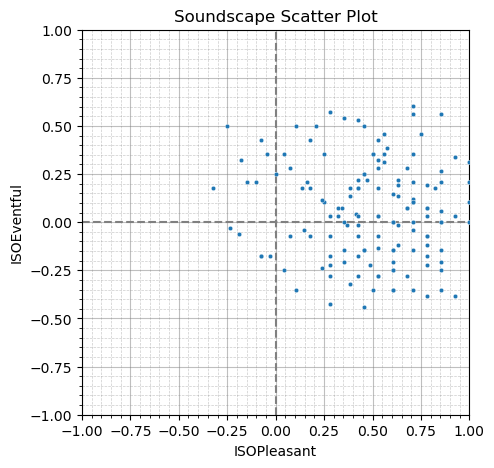

In [14]:
df.sspy.filter("LocationID", ['RussellSq']).sspy.scatter()

Each point in this scatter plot represents the ISOCoordinate values of one survey taken in Russell Square during all of the sessions. 

We can see that the `circumplex_scatter()` has added some customisations on top of the underlying `seaborn` plots. The first is to automatically scale the plot area to the -1 to +1 bounding of the circumplex. Second is the inclusion of a grid highlighting the typically quadrants of the circumplex. Finally, customised labels which make the relationship of the ISOPleasant and ISOEventful values more clear. 

This plot can be further customised though. For instance, if you don't like or need those custom primary labels, we can remove them by setting `prim_labels = False`. We could also add labels for the diagonal circumplex axes with `diagonal_lines = True`.

/home/mitch/Documents/GitHub/Soundscapy/soundscapy/plotting/circumplex.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **scatter_kws,


<AxesSubplot:title={'center':'Soundscape Scatter Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

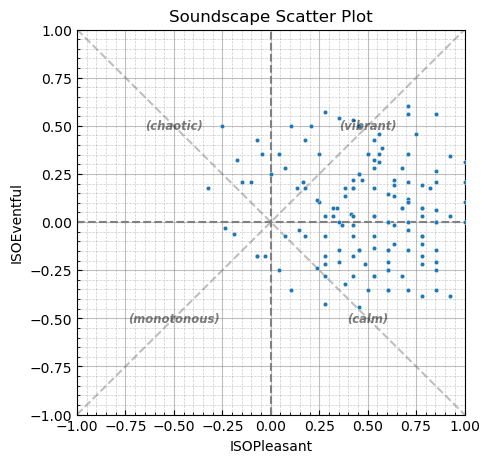

In [15]:
df.sspy.filter("LocationID", 'RussellSq').sspy.scatter(diagonal_lines=True)

It's also often very useful to plot the different sessions taken in the same location with different colours. This is done with the `hue` parameter. At the same time, we'll also add a legend and make the scatter points larger.

<AxesSubplot:title={'center':'RussellSq Sessions'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

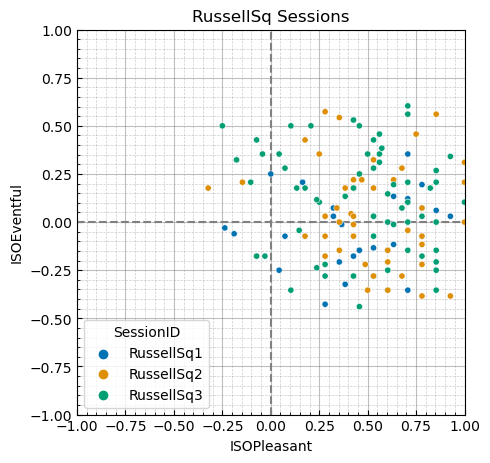

In [16]:
df.sspy.filter("LocationID", 'RussellSq').sspy.scatter(hue='SessionID', legend=True, s=20, title='RussellSq Sessions')

### Distribution Plots

The real power of `Soundscapy` is in creating plots of the distribution of soundscape assessments. The interface for doing this is the same as the scatter plots above.

/home/mitch/Documents/GitHub/Soundscapy/soundscapy/plotting/circumplex.py:354: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **scatter_kws,
/home/mitch/Documents/GitHub/Soundscapy/soundscapy/plotting/circumplex.py:426: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **kwargs,
/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,


<AxesSubplot:title={'center':'Soundscapy Density Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

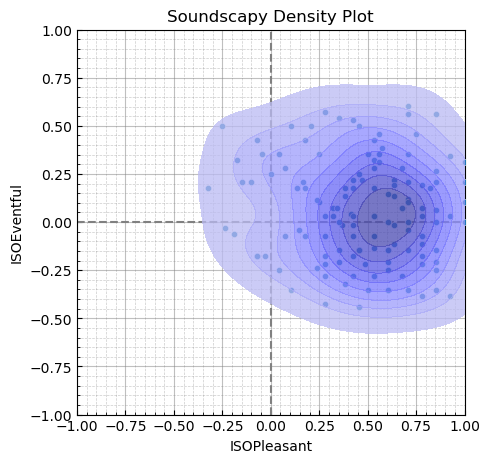

In [17]:
df.sspy.filter("LocationID", 'RussellSq').sspy.density()

This can be customised in the same ways as the scatter plots. To see how the scatter points and the density heatmap are related, we can add scatter points to the density plot.

/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,


<AxesSubplot:title={'center':'Soundscapy Density Plot'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

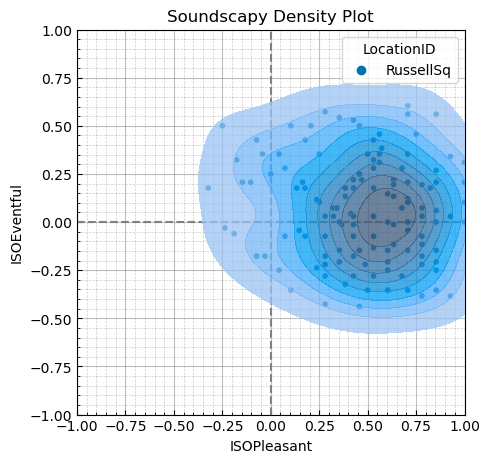

In [18]:
df.sspy.filter("LocationID", 'RussellSq').sspy.density(incl_scatter=True, alpha=0.75, hue="LocationID")

*How to analyse* proposes a method for simplifying this plot, allowing easy comparison between multiple soundscapes. In the simplified version, rather than showing the full distribution heatmap, we plot only the 50th percentile density curve, showing the general shape of the soundscape.

This is done by digging into `seaborn` `kdeplot()` and using its parameters `thresh` and `levels`. We'll also go ahead and customise some other aspects, such as the color palette.

/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,
/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,


<AxesSubplot:title={'center':'Median perception contour and scatter plot of individual assessments\n\n'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

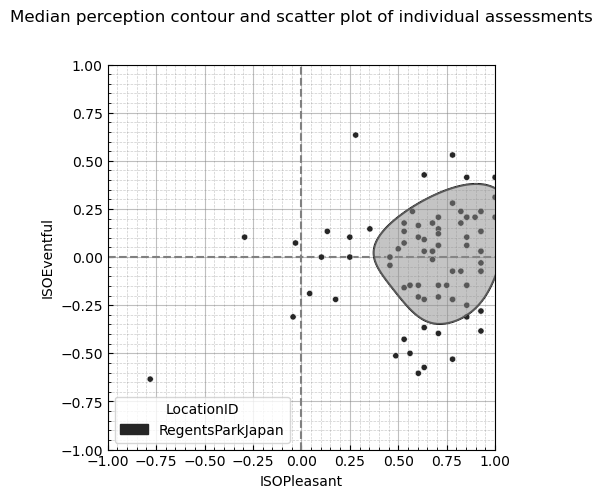

In [19]:
df.sspy.filter("LocationID", ['RegentsParkJapan']).sspy.density(
    title="Median perception contour and scatter plot of individual assessments\n\n",
    density_type="simple",
    hue="LocationID",
    legend=True,
    palette="dark:gray",
)

As we said, this is particularly useful for comparing different soundscapes. So let's see how we can plot three different soundscapes at once.

/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,
/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,


<AxesSubplot:title={'center':'Comparison of the soundscapes of three urban spaces\n\n'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

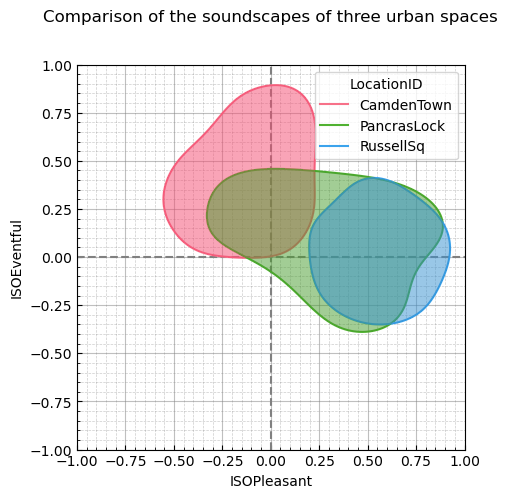

In [20]:
df.sspy.filter(
    "LocationID",
    ["CamdenTown", "RussellSq", "PancrasLock"]
).sspy.density(
    title="Comparison of the soundscapes of three urban spaces\n\n",
    hue="LocationID",
    density_type="simple",
    incl_scatter=False,
    palette="husl",
)

### Jointplot

/home/mitch/miniconda3/envs/soundscapy-dev/lib/python3.7/site-packages/seaborn/distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'data2'
  **contour_kws,


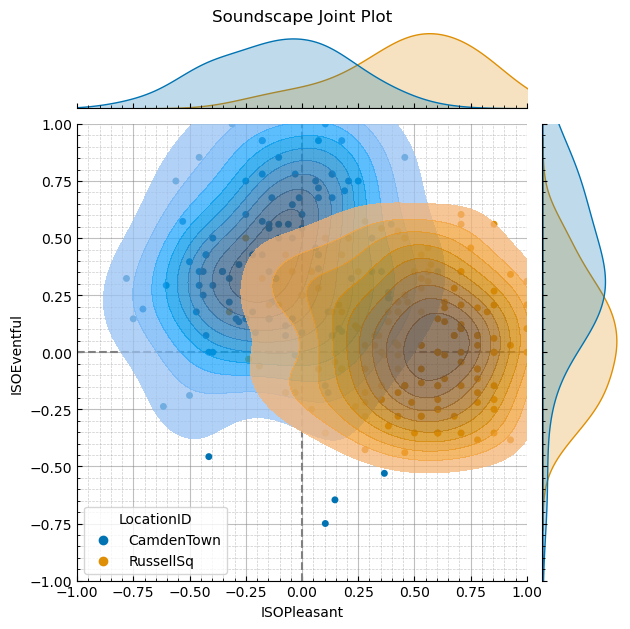

In [21]:
df.sspy.filter("LocationID", ["CamdenTown", "RussellSq"]).sspy.jointplot(hue="LocationID", marginal_kind="kde", density_type="full")